# Part I - Prosper Loans Data Exploration
## by Nasser Kaze

## Introduction

The data consists of 113,937 loans with 81 variables on each loan including loan amount, borrower(interest) rate, current loan status, borrower income, and many others. Some variables had to be simplified or summarized into smaller categories to make the analysis clearer and understandable. There are also so many variables, it would be too cumbersome to investigate them all. So the study focused on a few variables.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
# Loan dataset
loans = pd.read_csv("prosperLoanData.csv")

In [4]:
# high-level overview of data shape and composition
print(f"Number of Columns : {loans.shape[1]}")
print(f"Number of Rows : {loans.shape[0]}")

Number of Columns : 81
Number of Rows : 113937


In [5]:
# Observe data types
loans.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [6]:
# Observe a sample
loans.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [7]:
# Convert listing category from numeric to categorical values

ListingCategory = {
    0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use',
    6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
    11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental',
    16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation',  20: 'Wedding Loans'
}

loans['ListingCategory'] = loans['ListingCategory (numeric)'].apply(lambda x: ListingCategory[x])
loans = loans.drop(['ListingCategory (numeric)'], axis=1)

In [8]:
# Convert unordered variables to categorical columns

loans['EmploymentStatus'] = loans['EmploymentStatus'].astype('category')
loans['ListingCategory'] = loans['ListingCategory'].astype('category')
loans['BorrowerState'] = loans['BorrowerState'].astype('category')
loans['LoanStatus'] = loans['LoanStatus'].astype('category')
loans['Occupation'] = loans['Occupation'].astype('category')
loans['Term'] = loans['Term'].astype('category')

In [9]:

un_ordinal_var_dict = {
    'EmploymentStatus': ['Self-employed', 'Employed', 'Full-time', 'Other', 'Not employed', 'Part-time', 'Retired'],

    'ListingCategory': [ 'Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
        'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes', 'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
        'Large Purchases', 'Student Use', 'Boat', 'RV', 'Cosmetic Procedure', 'Green Loans'],

    'BorrowerState': ['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ',
        'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
        'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
        'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
        'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'],
        
    'LoanStatus': ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'],

    'Occupation': ['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',
       'Student - College Senior', 'Principal', "Teacher's Aide",
       'Pilot - Private/Commercial', 'Religious', 'Homemaker',
       'Student - College Graduate Student', 'Student - Technical School',
       'Psychologist', 'Biologist', 'Student - College Sophomore',
       'Judge', 'Student - College Junior', 'Car Dealer',
       'Student - Community College', 'Student - College Freshman']
}

for var in un_ordinal_var_dict:
    un_ordered_var = pd.api.types.CategoricalDtype(categories = un_ordinal_var_dict[var])
    loans[var] = loans[var].astype(un_ordered_var)

In [10]:
# Convert date columns to type datetime

loans['ListingCreationDate'] = pd.to_datetime(loans['ListingCreationDate'].astype(str))
loans['ClosedDate'] = pd.to_datetime(loans['ClosedDate'].astype(str))
loans['DateCreditPulled'] = pd.to_datetime(loans['DateCreditPulled'].astype(str))
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'].astype(str))
loans['FirstRecordedCreditLine'] = pd.to_datetime(loans['FirstRecordedCreditLine'].astype(str))

In [11]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {
     'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
     'CreditGrade': ['HR','E','D','C','B','A','AA'],
     'IncomeRange': ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
     'LoanOriginationQuarter': [
                         'Q4 2005',
                         'Q1 2006','Q2 2006','Q3 2006','Q4 2006',
                         'Q1 2007','Q2 2007','Q3 2007','Q4 2007',
                         'Q1 2008','Q2 2008','Q3 2008','Q4 2008',
                         'Q2 2009','Q3 2009','Q4 2009',
                         'Q1 2010','Q2 2010','Q3 2010','Q4 2010',
                         'Q1 2011','Q2 2011','Q3 2011','Q4 2011',
                         'Q1 2012','Q2 2012','Q3 2012','Q4 2012',
                         'Q1 2013','Q2 2013','Q3 2013','Q4 2013',
                         'Q1 2014'
                    ]
               }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [12]:
loans.describe()

,ListingNumber,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,26.000000,660.000000,679.000000,7.000000,6.000000,17.

In [13]:
loans.describe(include=['category'])

,CreditGrade,Term,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,LoanOriginationQuarter,ListingCategory
count,28812,113937,113937,84853,108422,110349,106335,106196,113937,96972
unique,7,3,12,7,51,67,7,7,33,20
top,C,36,Current,C,CA,Other,Employed,"$25,000-49,999",Q4 2013,Debt Consolidation
freq,5649,87778,56576,18345,14717,28617,67322,32192,14450,58308


In [14]:
loans.describe(include=['object'])

,ListingKey,GroupKey,LoanKey,MemberKey
count,113937,13341,113937,113937
unique,113066,706,113066,90831
top,17A93590655669644DB4C06,783C3371218786870A73D20,CB1B37030986463208432A1,63CA34120866140639431C9
freq,6,1140,6,9


### What is the structure of your dataset?

> There are 113,937 loans in the dataset

The Proper Rating and Credit Grade follow thesame ordered grading system.
 - 0 - N/A
 - 1 - HR
 - 2 - E
 - 3 - D
 - 4 - C
 - 5 - B
 - 6 - A
 - 7 - AA

 The Prosper Rating and Credit Grade both represent Loan Grades for loan pre and post 2009.

 There are also other categorical values such as: LoanStatus, BorrowerState, Occupation, EmploymentStatus, IncomeRange, LoanOriginationQuarter, Term, ListingCategory
 
 Most of the remaining variables are numeric.

### What is/are the main feature(s) of interest in your dataset?

> My interest is focused on the loan status more specifically to analyze the features that affect loan default rates.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The dataset has a large number of features in the dataset but for this analysis which makes it tricky to perform a full blown analysis. I would focus only

 I think the most interesting features for this investigation will be the CreditGrade, ProsperRating (Alpha), Occupation, EmploymentStatus, IncomeRange, ListingCategory which will have the most impact on the loans score.
Other numeric variables too such as the Loan Amount will also have an impact on the loan scores.

## Univariate Exploration


First I'll look at the distribution of the Loan Status

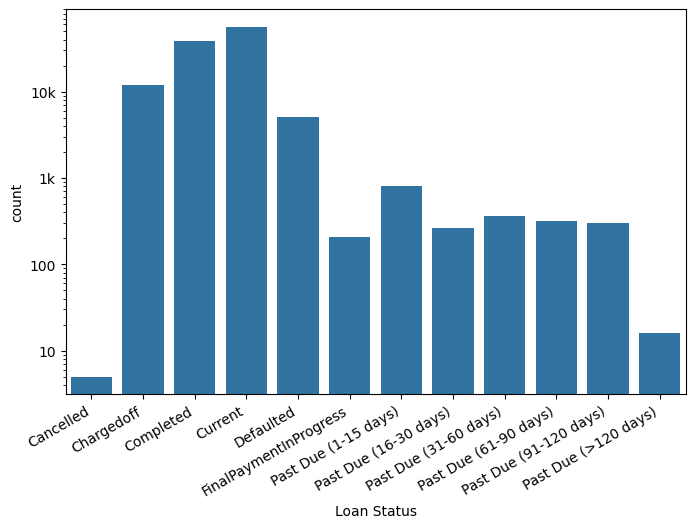

In [15]:
plt.figure(figsize=[8, 5])
default_color = sb.color_palette()[0]
sb.countplot(data=loans, x='LoanStatus', color=default_color)
plt.yscale('log')
plt.xlabel('Loan Status')
plt.yticks([1e1, 1e2, 1e3, 1e4], [10, 100, '1k', '10k'])
plt.xticks(rotation=30, ha='right')
plt.show()

The Loan Status has a lot of categories which aren't very relevant to my subject of interest and can be simplified for better visibility in the observations.
For this, I will simplify the loan status into 4 categories: `Completed`, `Current`, `Defaulted` and `Overdue`.

In [16]:
m = {
    'Completed': 'Completed', 'FinalPaymentInProgress': 'Completed', 'Current': 'Current', 
    'Defaulted': 'Defaulted', 'Chargedoff': 'Defaulted', 'Cancelled': 'Defaulted',
    'Past Due (1-15 days)': 'Overdue', 'Past Due (16-30 days)': 'Overdue', 'Past Due (61-90 days)': 'Overdue',
    'Past Due (31-60 days)': 'Overdue', 'Past Due (91-120 days)': 'Overdue', 'Past Due (>120 days)': 'Overdue'
}

loans['LoanStatus'] = loans['LoanStatus'].map(m).astype('category')

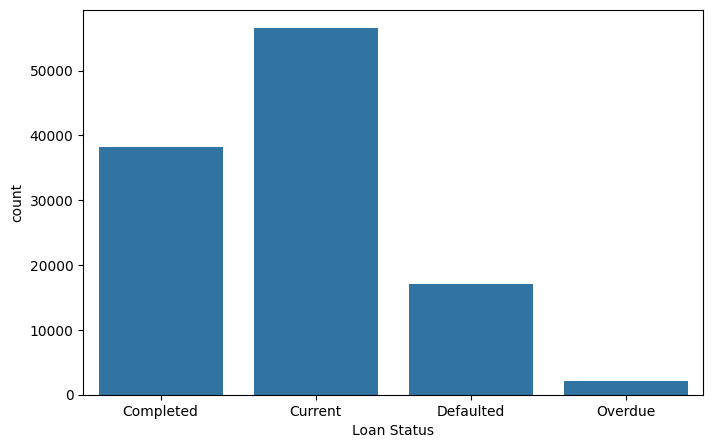

In [17]:
plt.figure(figsize=[8, 5])
default_color = sb.color_palette()[0]
sb.countplot(data=loans, x='LoanStatus', color=default_color)
plt.xlabel('Loan Status')
plt.show()

From the plot, we can see that the Current Loans take up most of the listings available and a very small proportion are the overdue loans.
Current and Overdue loans as not useful for my analysis and to minimize clutter in my visualizations, I will drop them.

In [18]:
loans = loans[loans['LoanStatus'].isin(['Completed', 'Defaulted'])]
loans['LoanStatus'] = loans['LoanStatus'].astype('str').astype('category')

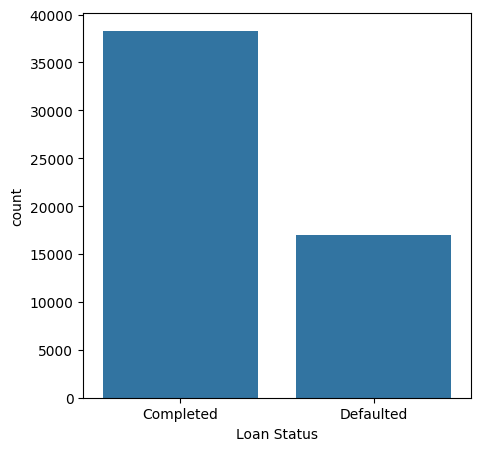

In [19]:
plt.figure(figsize=[5, 5])
default_color = sb.color_palette()[0]
sb.countplot(data=loans, x='LoanStatus', color=default_color)
plt.xlabel('Loan Status')
plt.show()

In [20]:
loan_status_count = loans['LoanStatus'].value_counts()
loan_status_percent = loans['LoanStatus'].value_counts(normalize=True) * 100

print(f"Loan Status Counts : \n{loan_status_count}")
print("\n")
print(f"Loan Status Percent : \n{loan_status_percent}")

Loan Status Counts : 
Completed    38279
Defaulted    17015
Name: LoanStatus, dtype: int64


Loan Status Percent : 
Completed    69.228126
Defaulted    30.771874
Name: LoanStatus, dtype: float64


Next, I will observe the categorical values to see how they are distributed

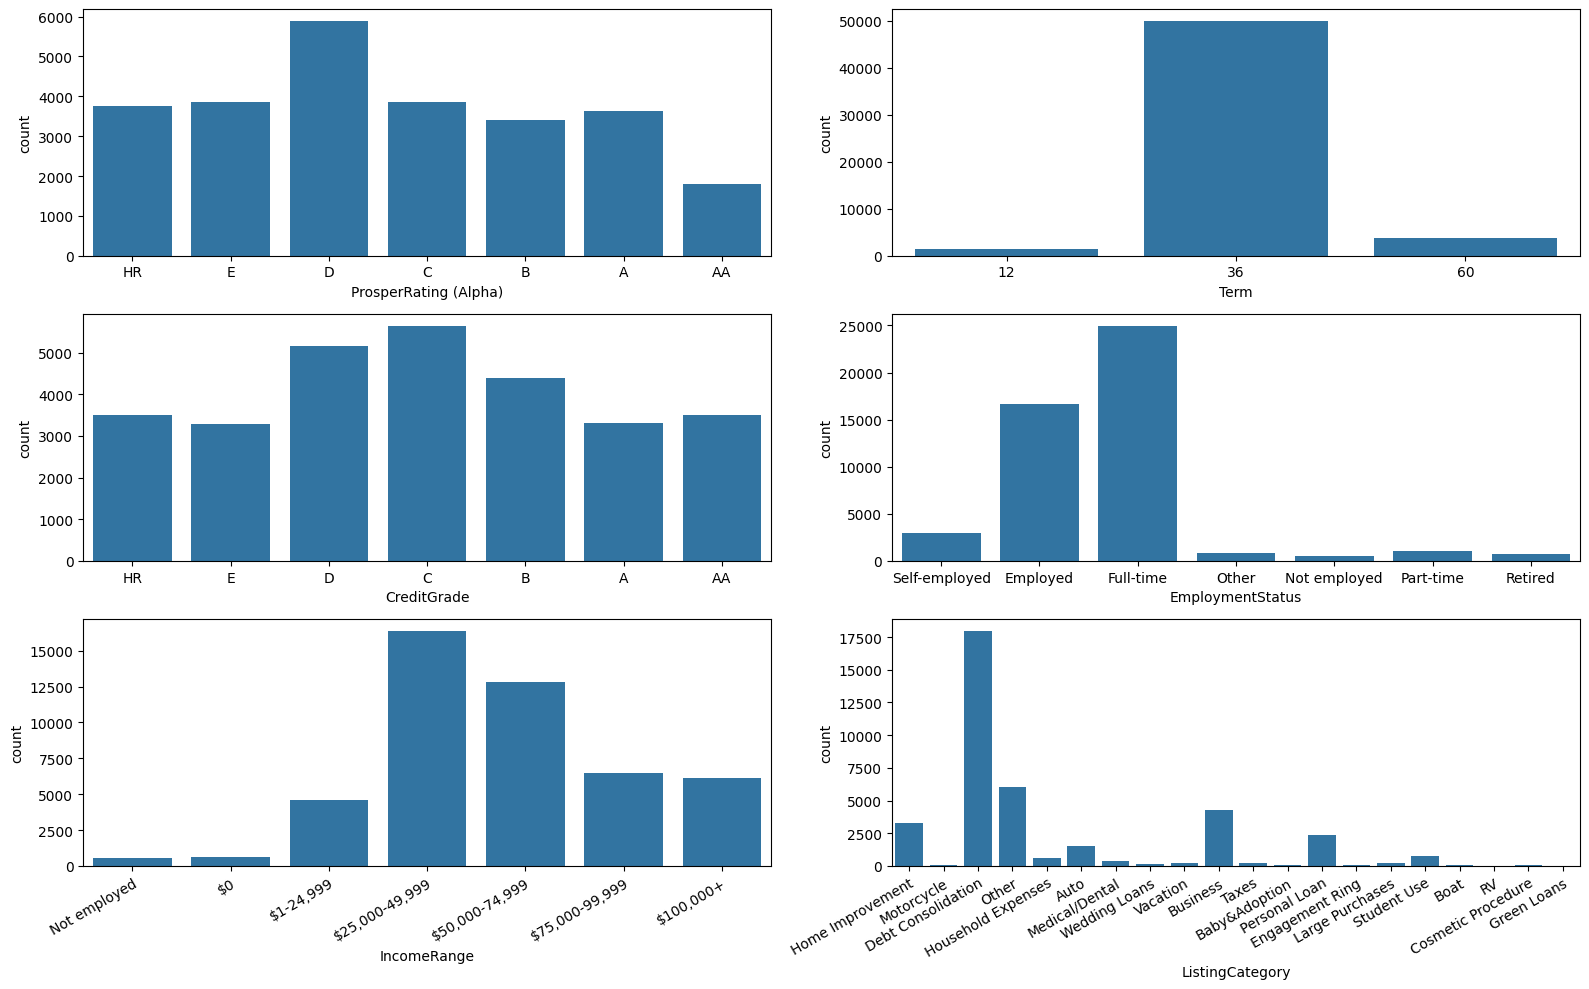

In [21]:
# Plotting categorical variables together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = [16,10])

default_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0,0])
sb.countplot(data = loans, x = 'CreditGrade', color = default_color, ax = ax[1,0])
sb.countplot(data = loans, x = 'IncomeRange', color = default_color, ax = ax[2,0])

sb.countplot(data = loans, x = 'Term', color = default_color, ax = ax[0,1])
sb.countplot(data = loans, x = 'EmploymentStatus', color = default_color, ax = ax[1,1])
sb.countplot(data = loans, x = 'ListingCategory', color = default_color, ax = ax[2,1])

plt.setp(ax[2,0].get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
plt.setp(ax[2,1].get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

plt.tight_layout()
plt.show()

From the datad dictionary, the Credit Grade and Prosper Rating both represent the loan grade before and after 2009.
These variable can be merged as one to better understand the visualisations and analysis

In [22]:
# First combine the CreditGrade and ProsperRating into 1 variable, LoanGrade.
from pandas import CategoricalDtype

loans['LoanGrade'] = loans['CreditGrade'].combine_first(loans['ProsperRating (Alpha)'])
loans['LoanGrade'] = loans['LoanGrade'].astype(CategoricalDtype(ordered=True, categories=['HR','E','D','C','B','A','AA']))

The employment status too is quite interesting but has too many categories that potentially mean thesame in the case of our analysis and would just clutter my observations. The best thinwould be to simplify these categories into `Employed`, `Unemployed`, `Retired` and `Other`

In [23]:
# Simplify the employment status into `Employed`, `Unemployed`, `Retired` and `Other`
m = { 
    'Self-employed': 'Employed', 'Full-time': 'Employed', 'Part-time': 'Employed', 'Employed': 'Employed',
    'Not employed': 'Unemployed', 'Retired': 'Retired', 'Other': 'Other'
}

loans['EmploymentStatus'] = loans['EmploymentStatus'].map(m).astype('category')

From the plot, we can also see that most listings were in the income range of 25000 to 75000. There are also big income earners within the income range greater than 75000. A smaller part of the distribution have incomes less than 25000. The `Not Employed` range and `$0` earners can be considered thesame.

In [24]:
# Joins `Not Employed` and `$0` income range.
m = {
    'Not employed': '$0',
    '$0': '$0',
    '$1-24,999': '$1-24,999',
    '$25,000-49,999': '$25,000-49,999',
    '$50,000-74,999': '$50,000-74,999',
    '$75,000-99,999': '$75,000-99,999',
    '$100,000+': '$100,000+'
}

loans['IncomeRange'] = loans['IncomeRange'].map(m).astype(CategoricalDtype(ordered=True,
                                                categories=['$0', '$1-24,999', '$25,000-49,999',
                                                 '$50,000-74,999', '$75,000-99,999', '$100,000+']))

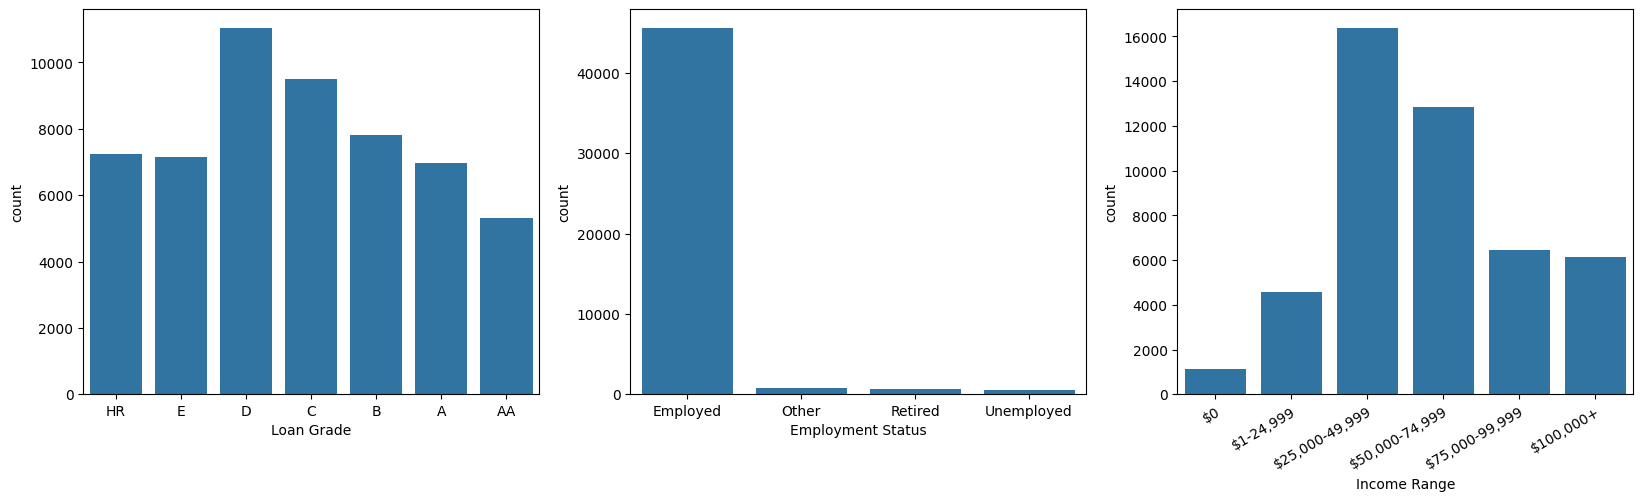

In [25]:
# Replotting the simplified categories

fig, ax = plt.subplots(ncols=3, figsize = [20,5])

default_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'LoanGrade', color = default_color, ax = ax[0])
sb.countplot(data = loans, x = 'EmploymentStatus', color = default_color, ax = ax[1])
sb.countplot(data = loans, x = 'IncomeRange', color = default_color, ax = ax[2])

ax[0].set_xlabel("Loan Grade")
ax[1].set_xlabel("Employment Status")
ax[2].set_xlabel("Income Range")

plt.setp(ax[2].get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

plt.show()

The loan grade shows an interesting distribution. It can be observed that loans in the grade D and C are very popular.
The employment status on the other hand mostly has employed values and close to no values in the other categories.
The income range too is shows that most listings were in the income range of 25000 to 75000 with significantly little 0 income earners.

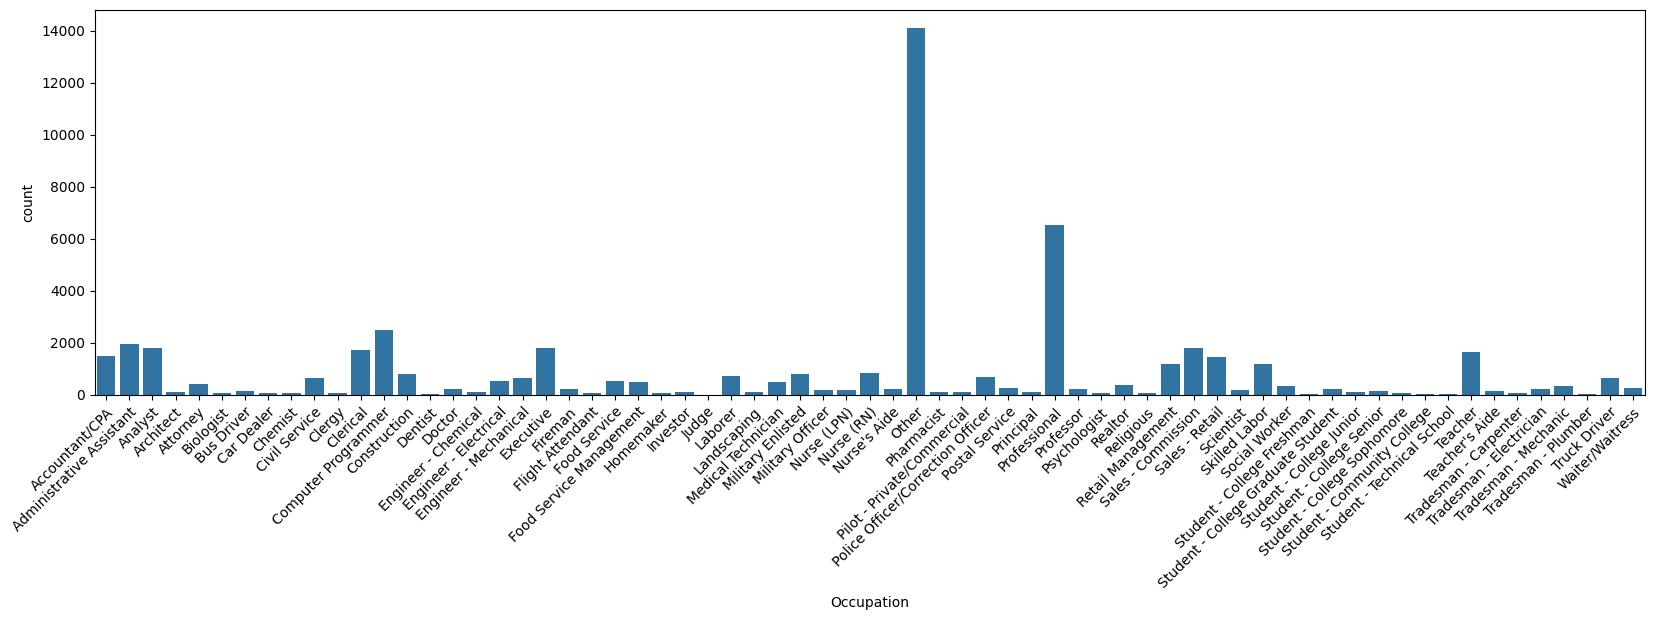

In [26]:
# Bar plot of occupation

plt.figure(figsize=[20, 5])
default_color = sb.color_palette()[0]
sb.countplot(data=loans, x='Occupation', color=default_color)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Occupation')
plt.show()

The occupation distribution is a little interesting. Though most of the occupations are registered as `Other` and `Professional` which is quite vague and doesn't convey any valuable insight for my analysis.
Regardless of that, we can observe that most borrowers were either `Accountant`, `Administrative Assistant`, `Analyst`, `Clerical`, `Computer Programmer`, `Construction`, `Executive`, `Retail Management`, `Sales - Commission`, `Sales - Retail`, `Skilled Labor` or `Teacher`.

I will also look at the loan origination quarter to see the periods with the most listings

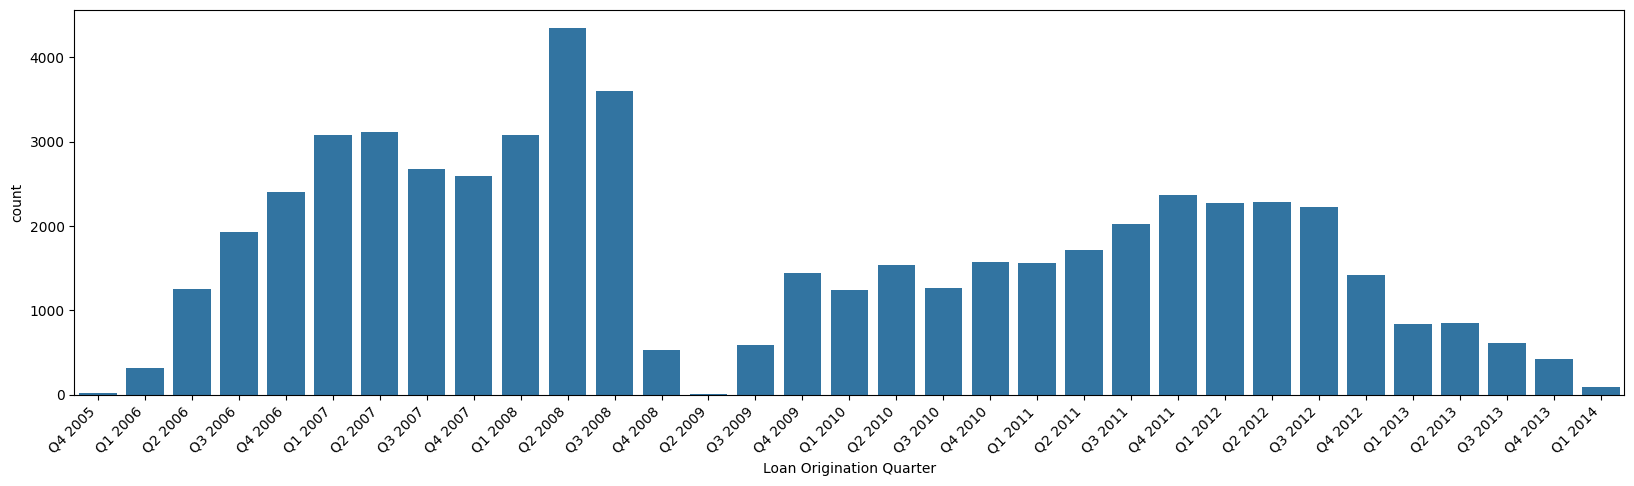

In [27]:
# Countplot of Loan Origination Quarter

plt.figure(figsize=[20, 5])
default_color = sb.color_palette()[0]
sb.countplot(data=loans, x='LoanOriginationQuarter', color=default_color)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Loan Origination Quarter')
plt.show()

From the plot we can observe a wave of loans with a spike between Q2 of 2006 to Q4 of 2008 and another slight increase between Q3 2009 to Q1 2014 though the spikle is greater in the former.

I also have in the records information on if the borrower is a home owner, is the income veriable or belongs to a group

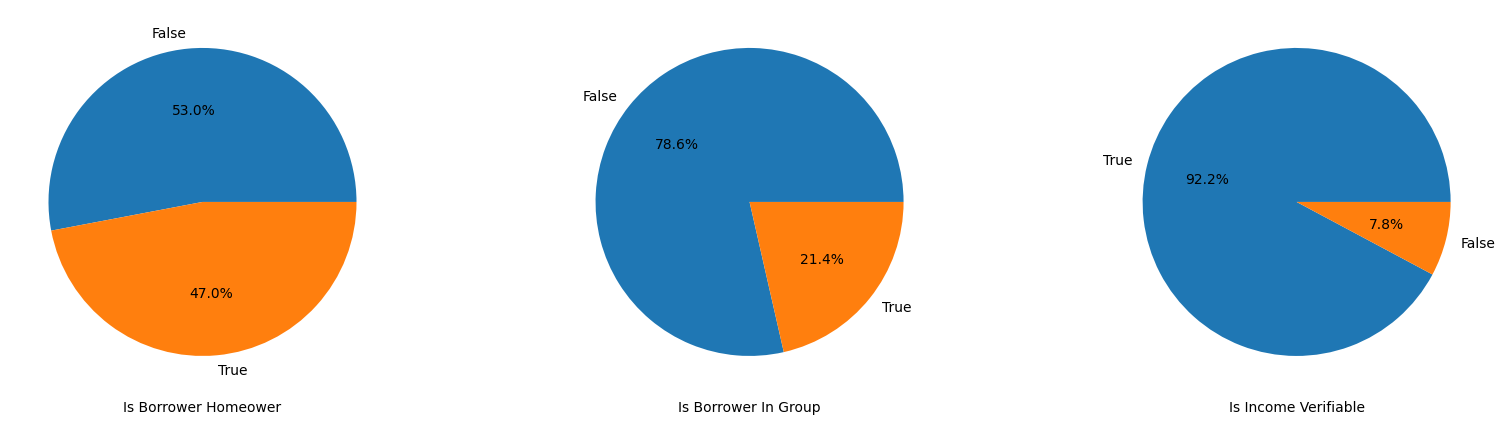

In [28]:
# Plotting Boolean Variables together to see the  distribution

fig, ax = plt.subplots(ncols=3, figsize = [20,5])
bool_vars = ['IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeVerifiable']

for i, var in enumerate(bool_vars):
    count = loans[var].value_counts()
    ax[i].pie(count, labels=count.index, autopct='%1.1f%%')

ax[0].set_xlabel("Is Borrower Homeower")
ax[1].set_xlabel("Is Borrower In Group")
ax[2].set_xlabel("Is Income Verifiable")

plt.show()

The distribution shows more interesting insights with the home ownership status where there are almost equally distributed. The Group membership status and income verifiable are mostly one sided and would reveal little insight.

Next, I would look at numeric values.

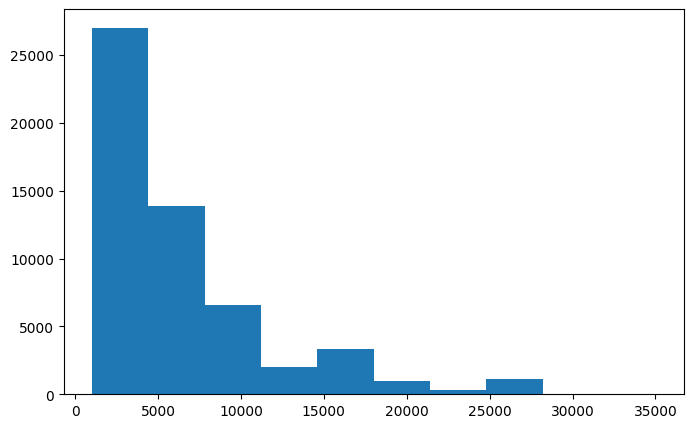

In [29]:
# Plot a standard scaled plot of Loan Amounts

log_binsize = 0.05
bins = 10 ** np.arange(3, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='LoanOriginalAmount')

plt.show()

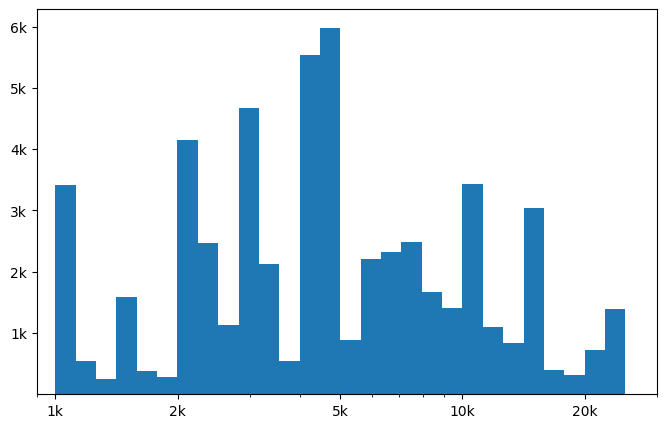

In [30]:
# Put the plot on a log scale to better visualize the values on the right

log_binsize = 0.05
bins = 10 ** np.arange(3, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='LoanOriginalAmount', bins=bins)
plt.xscale('log')
plt.xlim([9e2, 3e4])
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4], ['1k', '2k', '5k', '10k', '20k'])
plt.yticks([1e3, 2e3, 3e3, 4e3, 5e3, 6e3], ['1k', '2k', '3k', '4k', '5k', '6k'])

plt.show()

The loan amount has an interesting distribution. There are sporadic high spikes showing that some loan amounts were very popular among borrowers with the highest peak in amounts between 3000 and 5000.

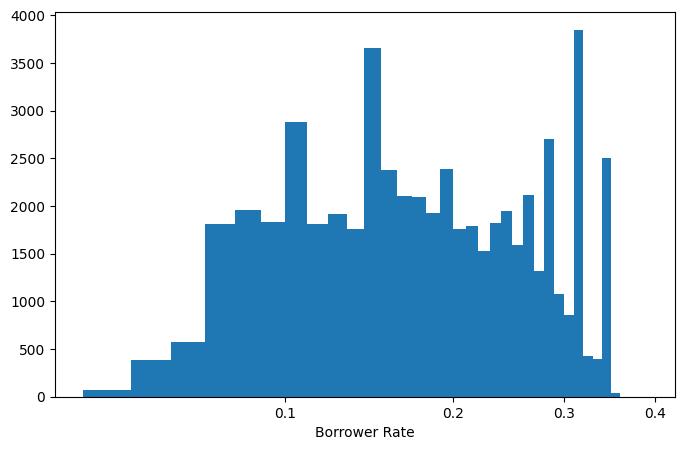

In [31]:
# Plotting the borrower rate on a logit scale

binsize = 0.01
bins = np.arange(0.04, 0.4, binsize)
labels = [0.1, 0.2, 0.3, 0.4]

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerRate', bins=bins)
plt.xscale('logit')
plt.xticks(labels, labels)
plt.xlabel('Borrower Rate')
plt.show()

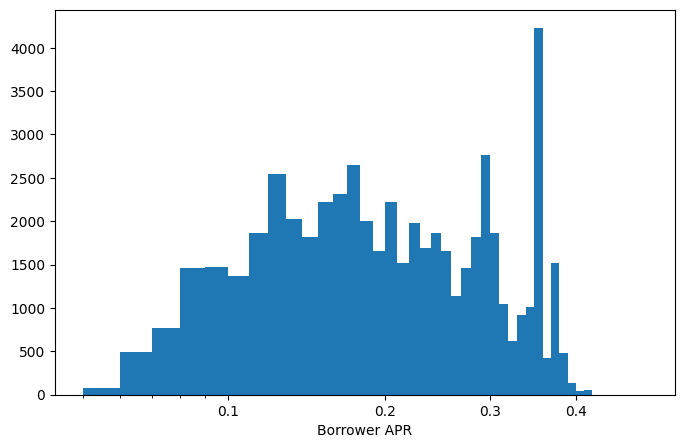

In [32]:
# Plotting the borrower APR on a logit scale

binsize = 0.01
bins = np.arange(0.05, 0.5, binsize)
labels = [0.1, 0.2, 0.3, 0.4]

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerAPR', bins=bins)
plt.xscale('logit')
plt.xticks(labels, labels)
plt.xlabel('Borrower APR')
plt.show()

Plotting the borrower Rate and Borrower APR, I observe that they have a verys similar dsitribution which makes sense as they basically represent thesame value except for slight differences in the Borrower's APR as it not only represents the interest rate but also additional fees and charges included in the rate which makes the APR a better category for observation.

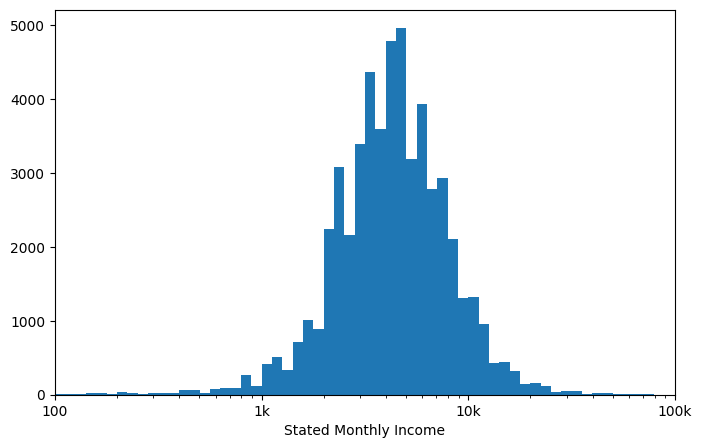

In [33]:
# Plotting the Stated Monthly Income on a log scale

log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(loans['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='StatedMonthlyIncome', bins=bins)
plt.xscale('log')
plt.xlim([100, 1e5])
plt.xticks([1e2, 1e3, 1e4, 1e5], [100, '1k', '10k', '100k'])
plt.xlabel("Stated Monthly Income")

plt.show()

The plot shows that the monthly income is typically in the range between 2000 and 12000 per month.
I would be more interesting to observe the income per annum as this will provide easier to process insights in the data that can easily be correlated to the Income Range categorical variable.

In [34]:
# Create annual income column

loans['AnnualIncome'] = loans['StatedMonthlyIncome'] * 12

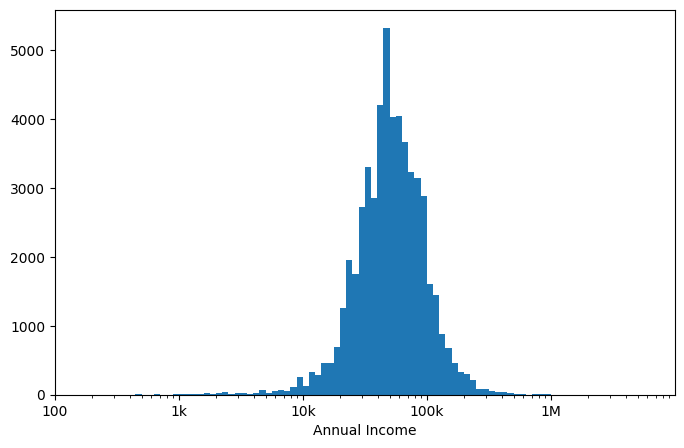

In [35]:
# Plotting the annual income on a log scale

log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(loans['AnnualIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='AnnualIncome', bins=bins)
plt.xscale('log')
plt.xlim([100, 1e7])
plt.xticks([1e2, 1e3, 1e4, 1e5, 1e6], [100, '1k', '10k', '100k', '1M'])
plt.xlabel("Annual Income")

plt.show()

We can see that the most income earners are in the range of 30000 and 80000 per annum which correlates with the income range observed above.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The numeric variables took long range of values and needed scaling to observe their distribtution better. The Annual Income and Loan Amount had to be scaled on a log scale  while the Borrower's Interest Rate and APR had to be scaled on a logit scale since the values where distributed between 0 and 1.

The categorical variables had too many details that were hard to observe in a plot and required to be simplified. I did some summarization in the loan status, employment status and income range values to adjust them into smaller and more meaningful categories.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

While investigating the Occupation, most values where recorded either as `Other` or `Professional` which represents very vague information.

## Bivariate Exploration

In [36]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'AnnualIncome', 'AmountDelinquent', 'RevolvingCreditBalance']
categoric_vars = ['Term', 'IncomeRange', 'EmploymentStatus', 'LoanGrade', 'LoanStatus']

First I want to investigate any possible correlations between the numeric variables

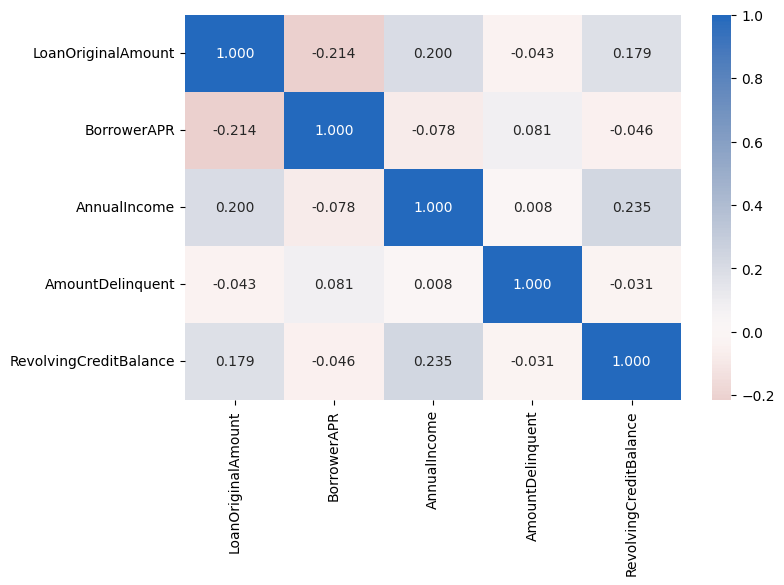

In [37]:
# correlation plot

plt.figure(figsize = [8, 5])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

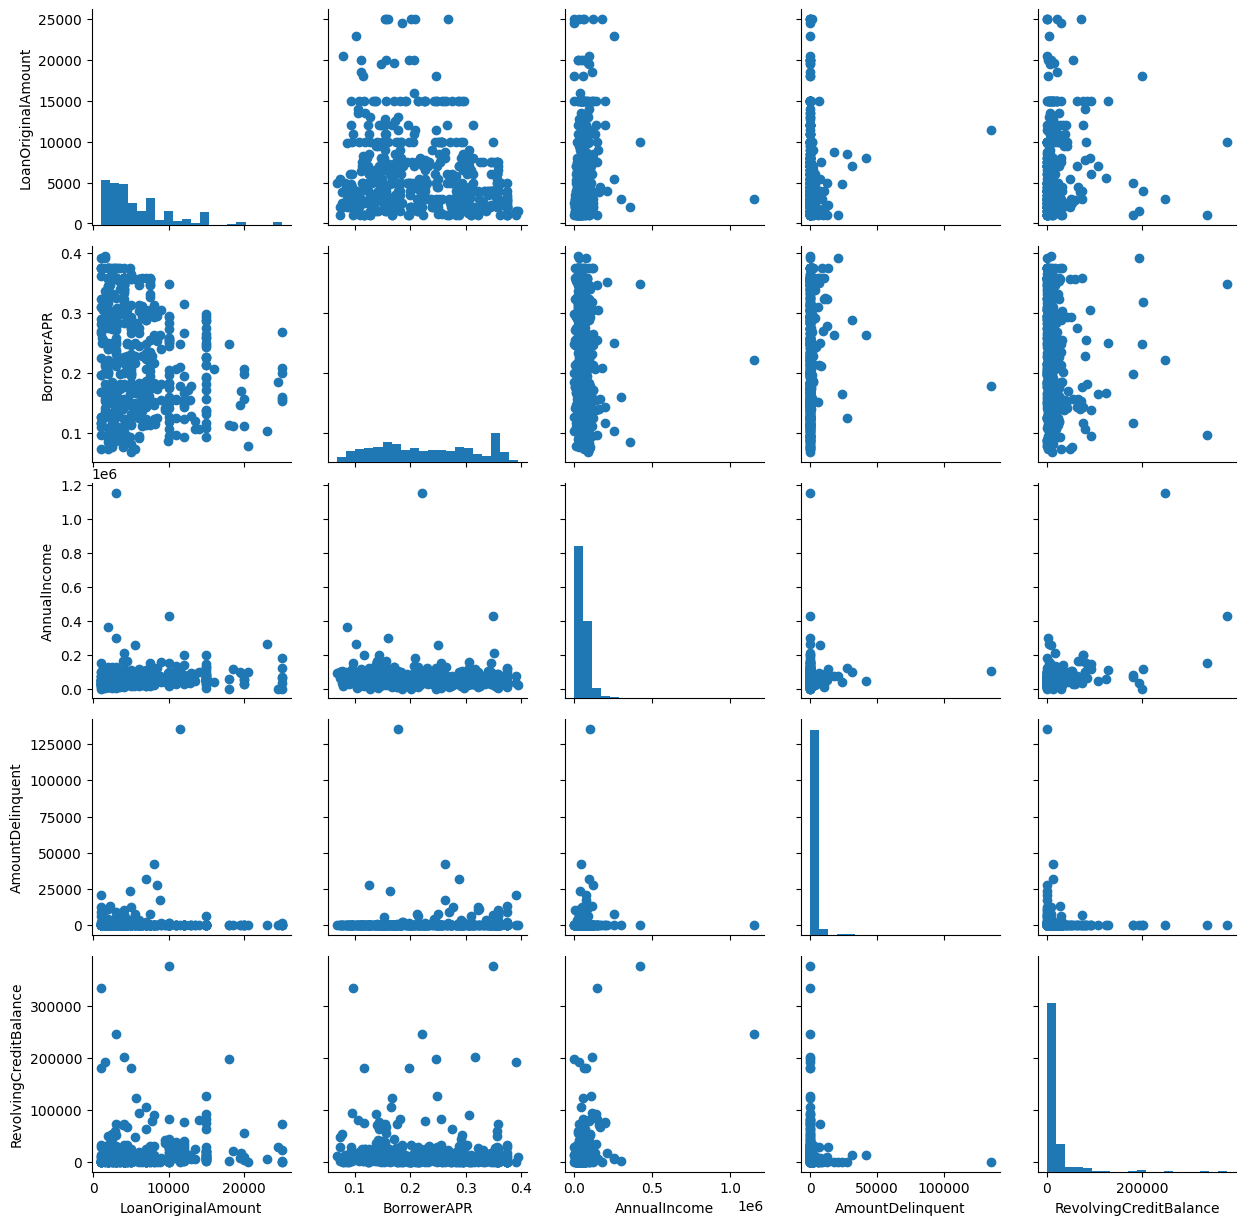

In [38]:
# plot matrix with a 500 sample for faster and clearer rendering

loans.reset_index(inplace=True, drop=True)
samples = np.random.choice(loans.shape[0], 500, replace = False)
loan_samples = loans.loc[samples,:]

g = sb.PairGrid(data=loan_samples, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

plt.show()

From the heatmap and pairgrid, there are no strong correlations between the numeric variables. Their associations are very random.

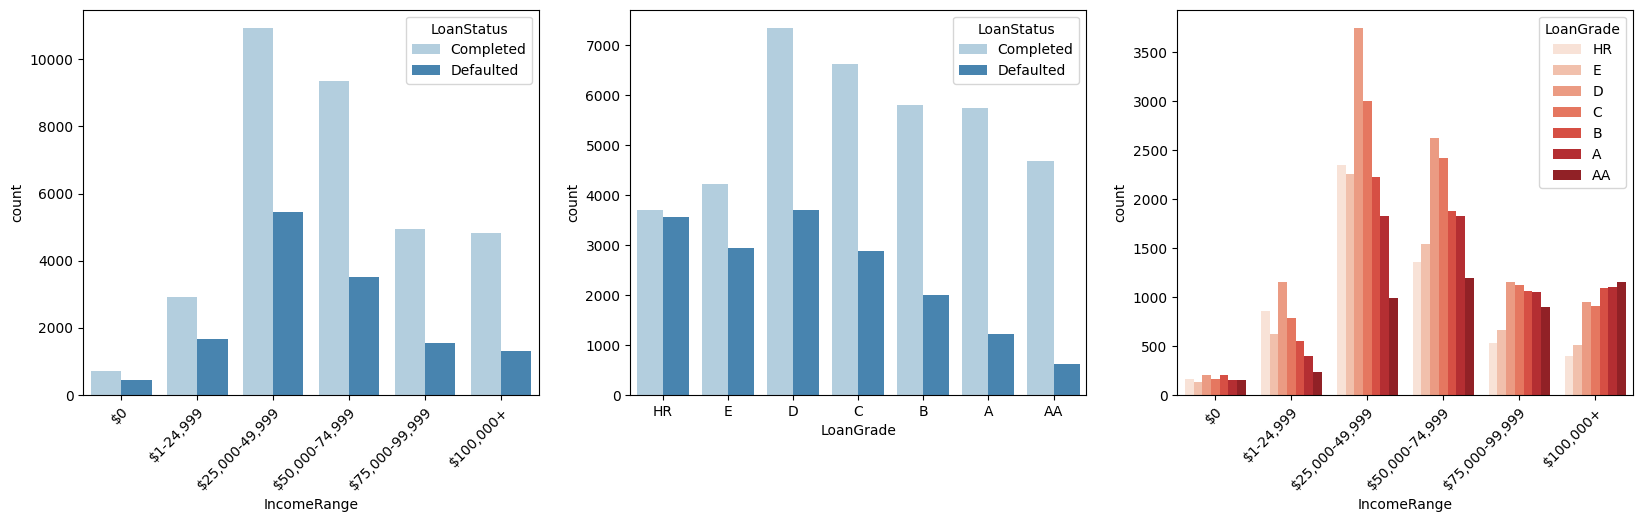

In [39]:
fig, ax = plt.subplots(ncols=3, figsize = [20, 5])

# subplot 1: IncomeRange vs LoanStatus
sb.countplot(data = loans, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Blues', ax=ax[0])

# subplot 2: LoanGrade vs. LoanStatus
sb.countplot(data = loans, x = 'LoanGrade', hue = 'LoanStatus', palette = 'Blues', ax=ax[1])

# subplot 2: IncomeRange vs. LoanGrade
sb.countplot(data = loans, x = 'IncomeRange', hue = 'LoanGrade', palette = 'Reds', ax=ax[2])

plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[2].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()

The loan status distribution with the income range seems balanced with relatively low default rates through out the distribution except for the 0 income earners who have almost equal defaulters and completed loans.

The loan grade vs default rate shows a steady drop in defaults in increase in loan grade. Loans with HR grade were just as likely to default while those with AA where less likely to default.

The plot of the income range with the loan grade is more insightful. We can observe people with a higher income range tend to take loans with with a higher grade. Loans of Grade D is very popular wit people in the 25000 to 50000 income range.

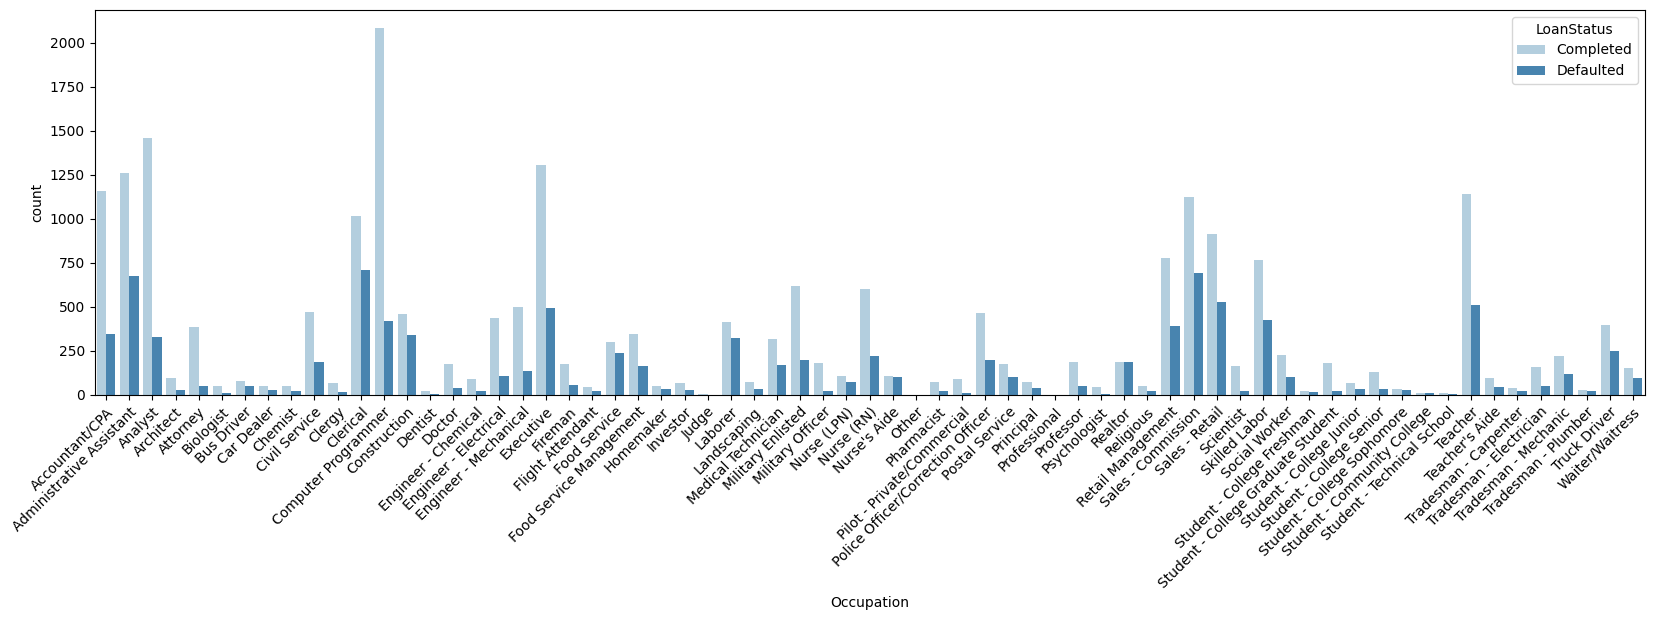

In [40]:
# Observing Occupation against Loan Status

plt.figure(figsize=[20, 5])

loans_occupations = loans[loans['Occupation'] != 'Other']
loans_occupations = loans_occupations[loans_occupations['Occupation'] != 'Professional']


sb.countplot(data=loans_occupations, x='Occupation', hue='LoanStatus', palette='Blues')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

plt.show()

The popular occupations such as accountant have low default rates while less popular tend to have a higher default rate.

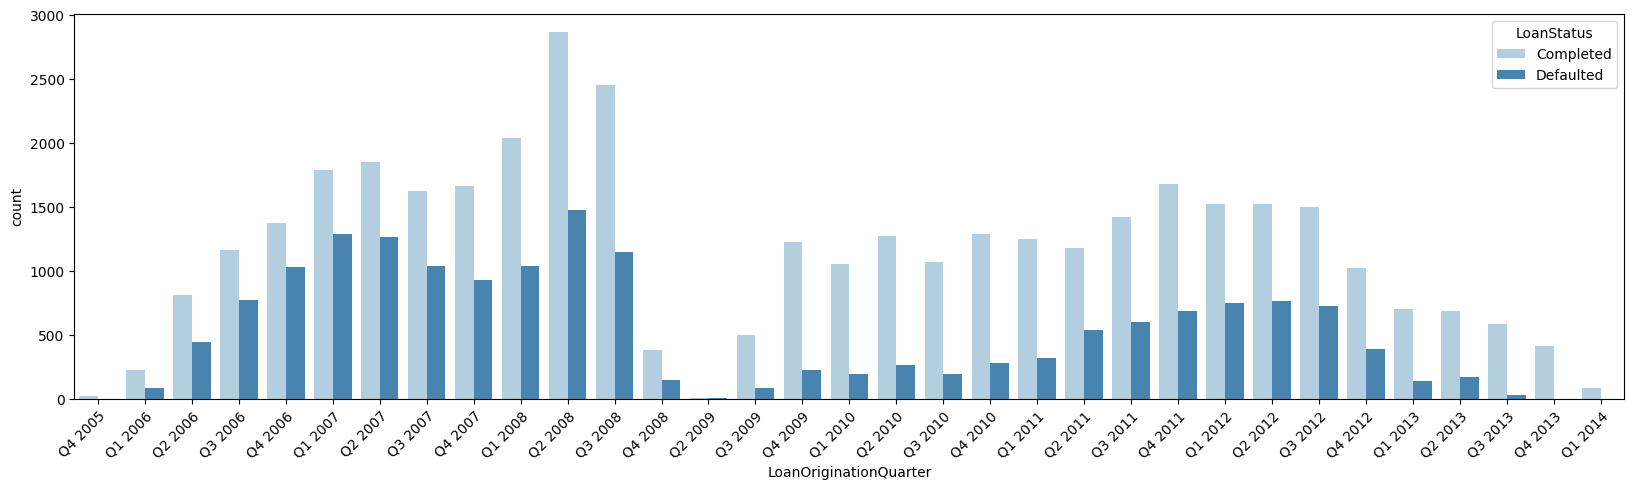

In [41]:
# Observing Loan Origination Quarter against Loan Status

plt.figure(figsize=[20, 5])

sb.countplot(data=loans, x='LoanOriginationQuarter', hue='LoanStatus', palette='Blues')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

plt.show()

The loan origination quarter by loan status plot shows an increase in completed loans from Q3 2009 with no defaulters in Q4 of 2013 and Q1 2014.

/var/folders/fy/8jb2hm6j5vb8xcb_0pgh11x80000gn/T/ipykernel_6823/2821077832.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income_range_loans = loans.groupby('IncomeRange').mean()


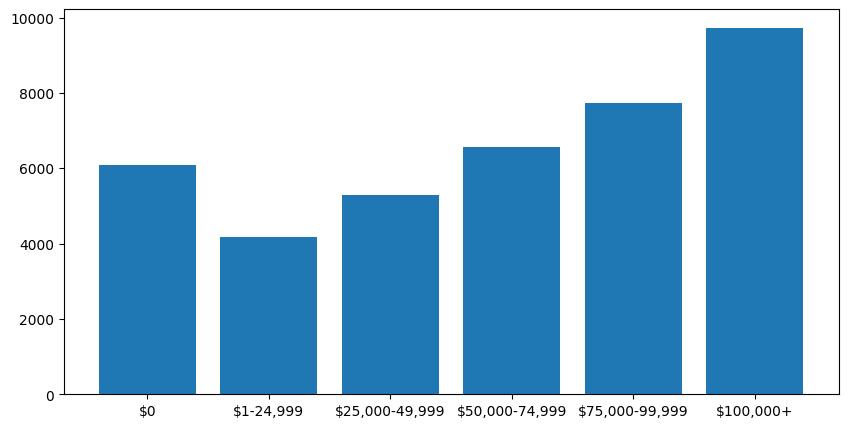

In [42]:
# Observing Income Range by Loan Amount

income_range_loans = loans.groupby('IncomeRange').mean()

plt.figure(figsize=[10, 5])

plt.bar(x=income_range_loans.index, height=income_range_loans['LoanOriginalAmount'])
plt.show()

Investigating the Loan Amount per Income Range, I could see that people with 0 income tned to have more loans and the need for loans drops with 1-25000 income range and gradually increases with income range.

<Figure size 1500x1500 with 0 Axes>

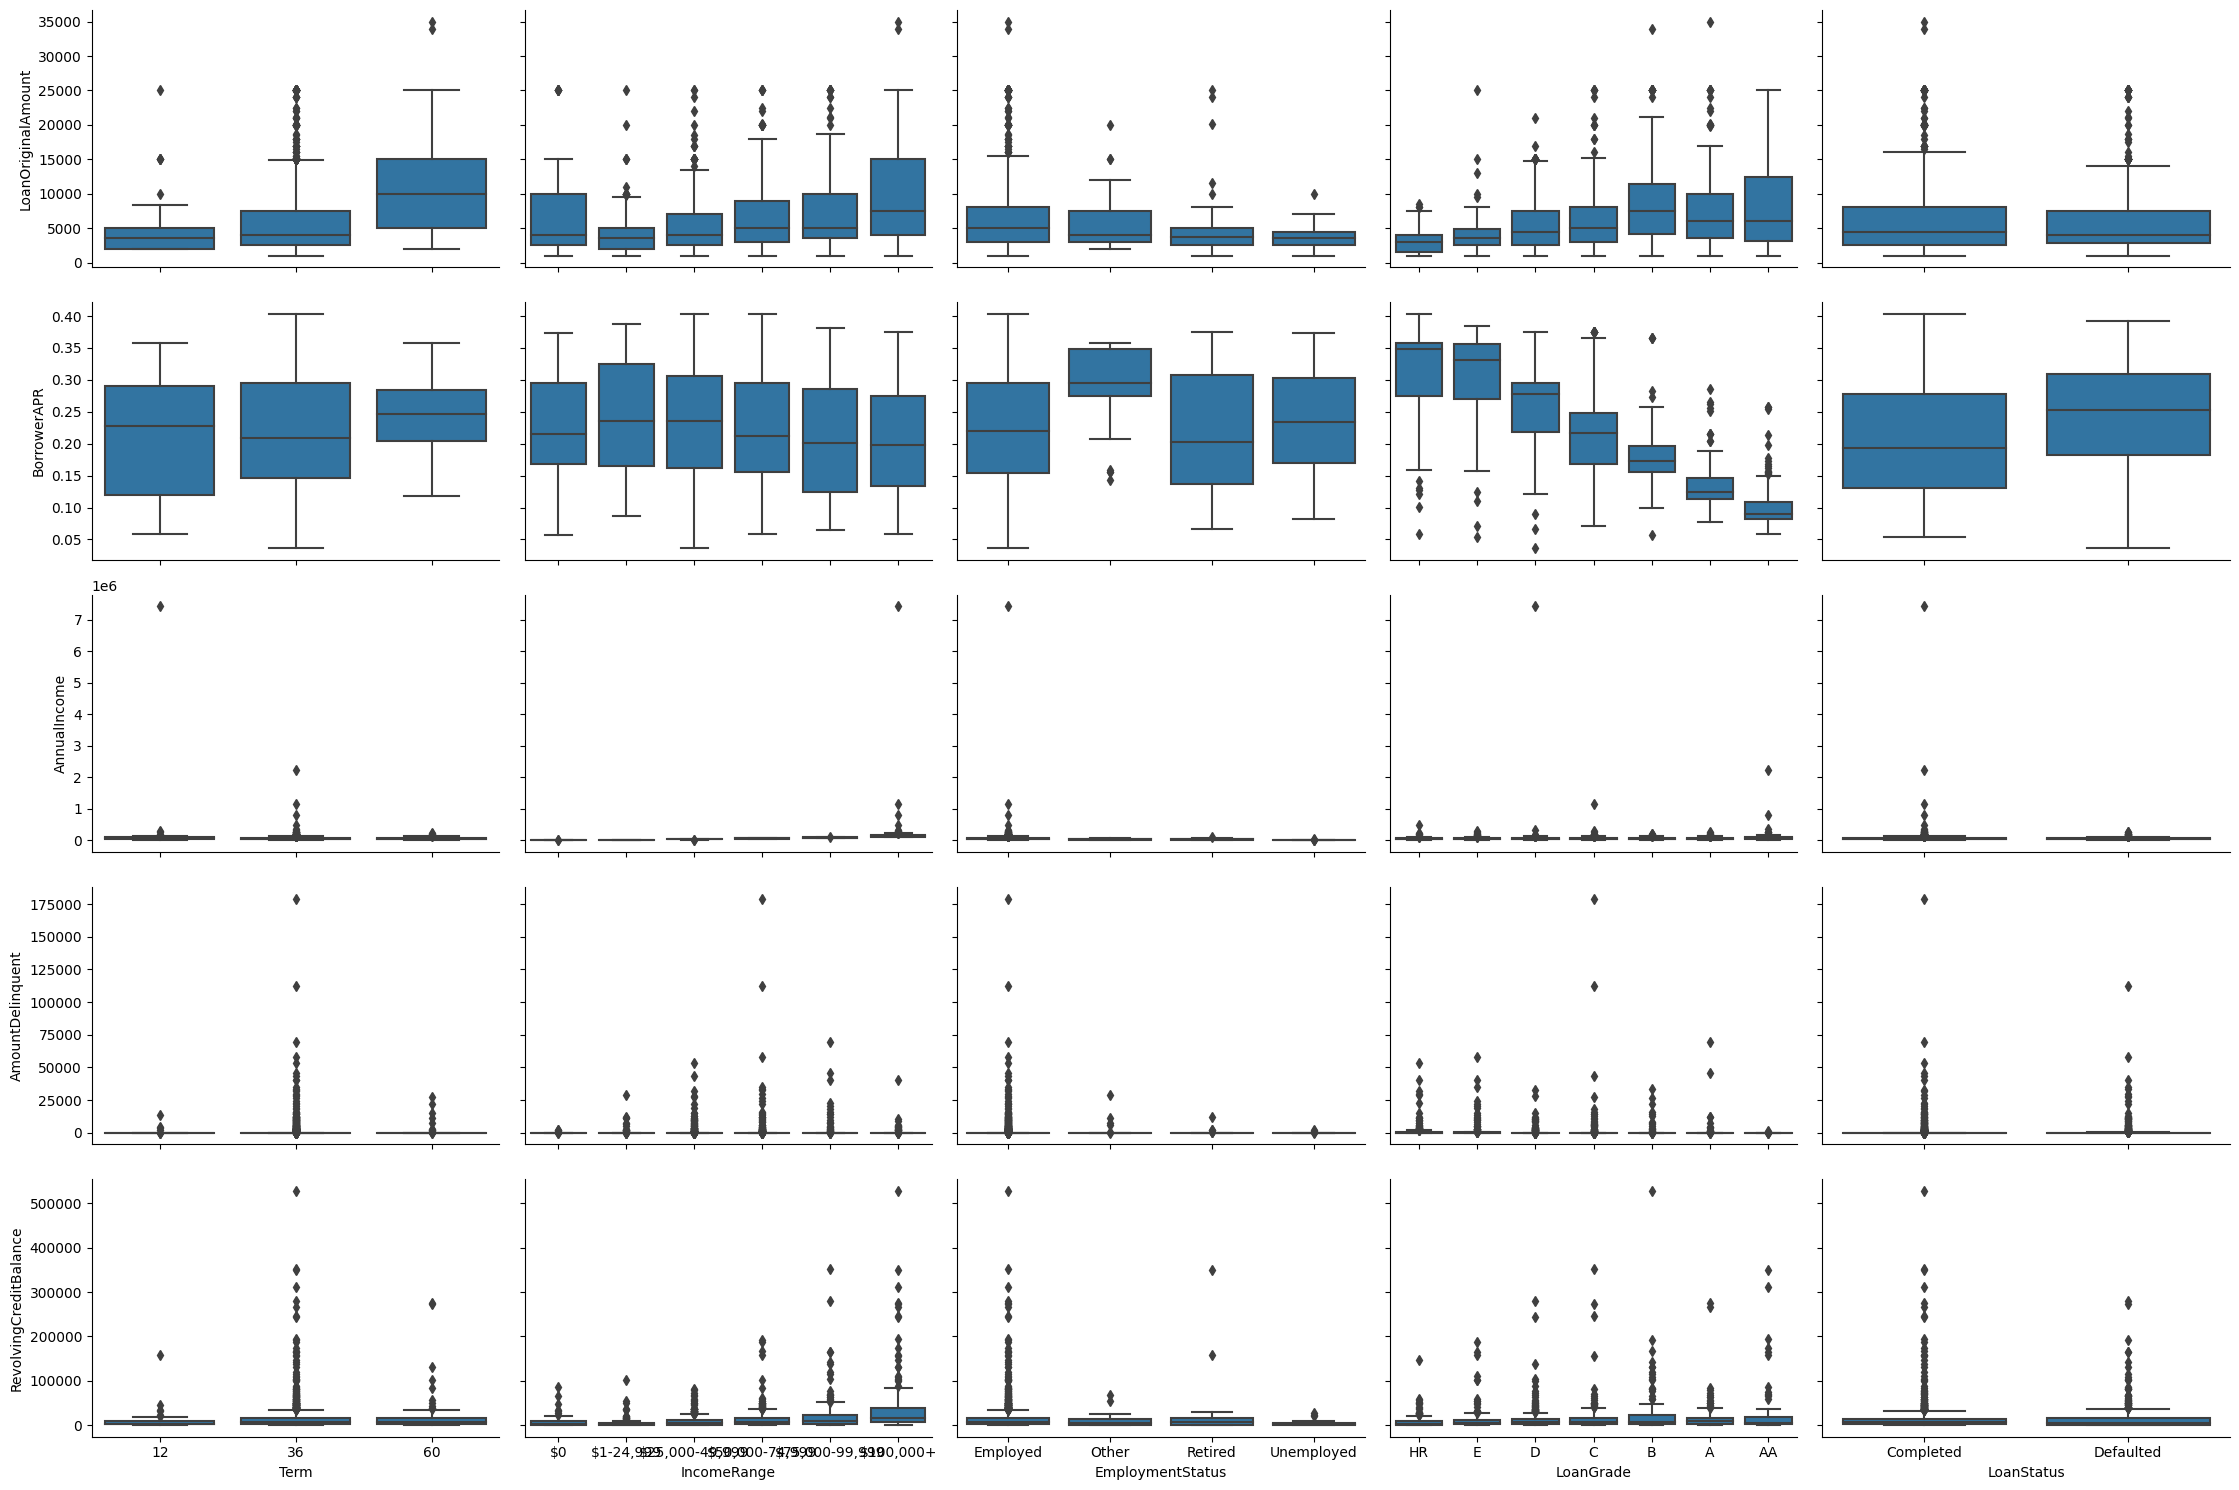

In [43]:
# Use a Pair Grid of Box Plots to observe the relationship between numeric and categorical variables

loan_samples = loans.sample(n=2000, replace = False)

default_color = sb.color_palette()[0]
def boxgrid(x, y, **kwargs):
    sb.boxplot(x=x, y=y, color=default_color)
    

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = loan_samples, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)

plt.tight_layout()
plt.show()

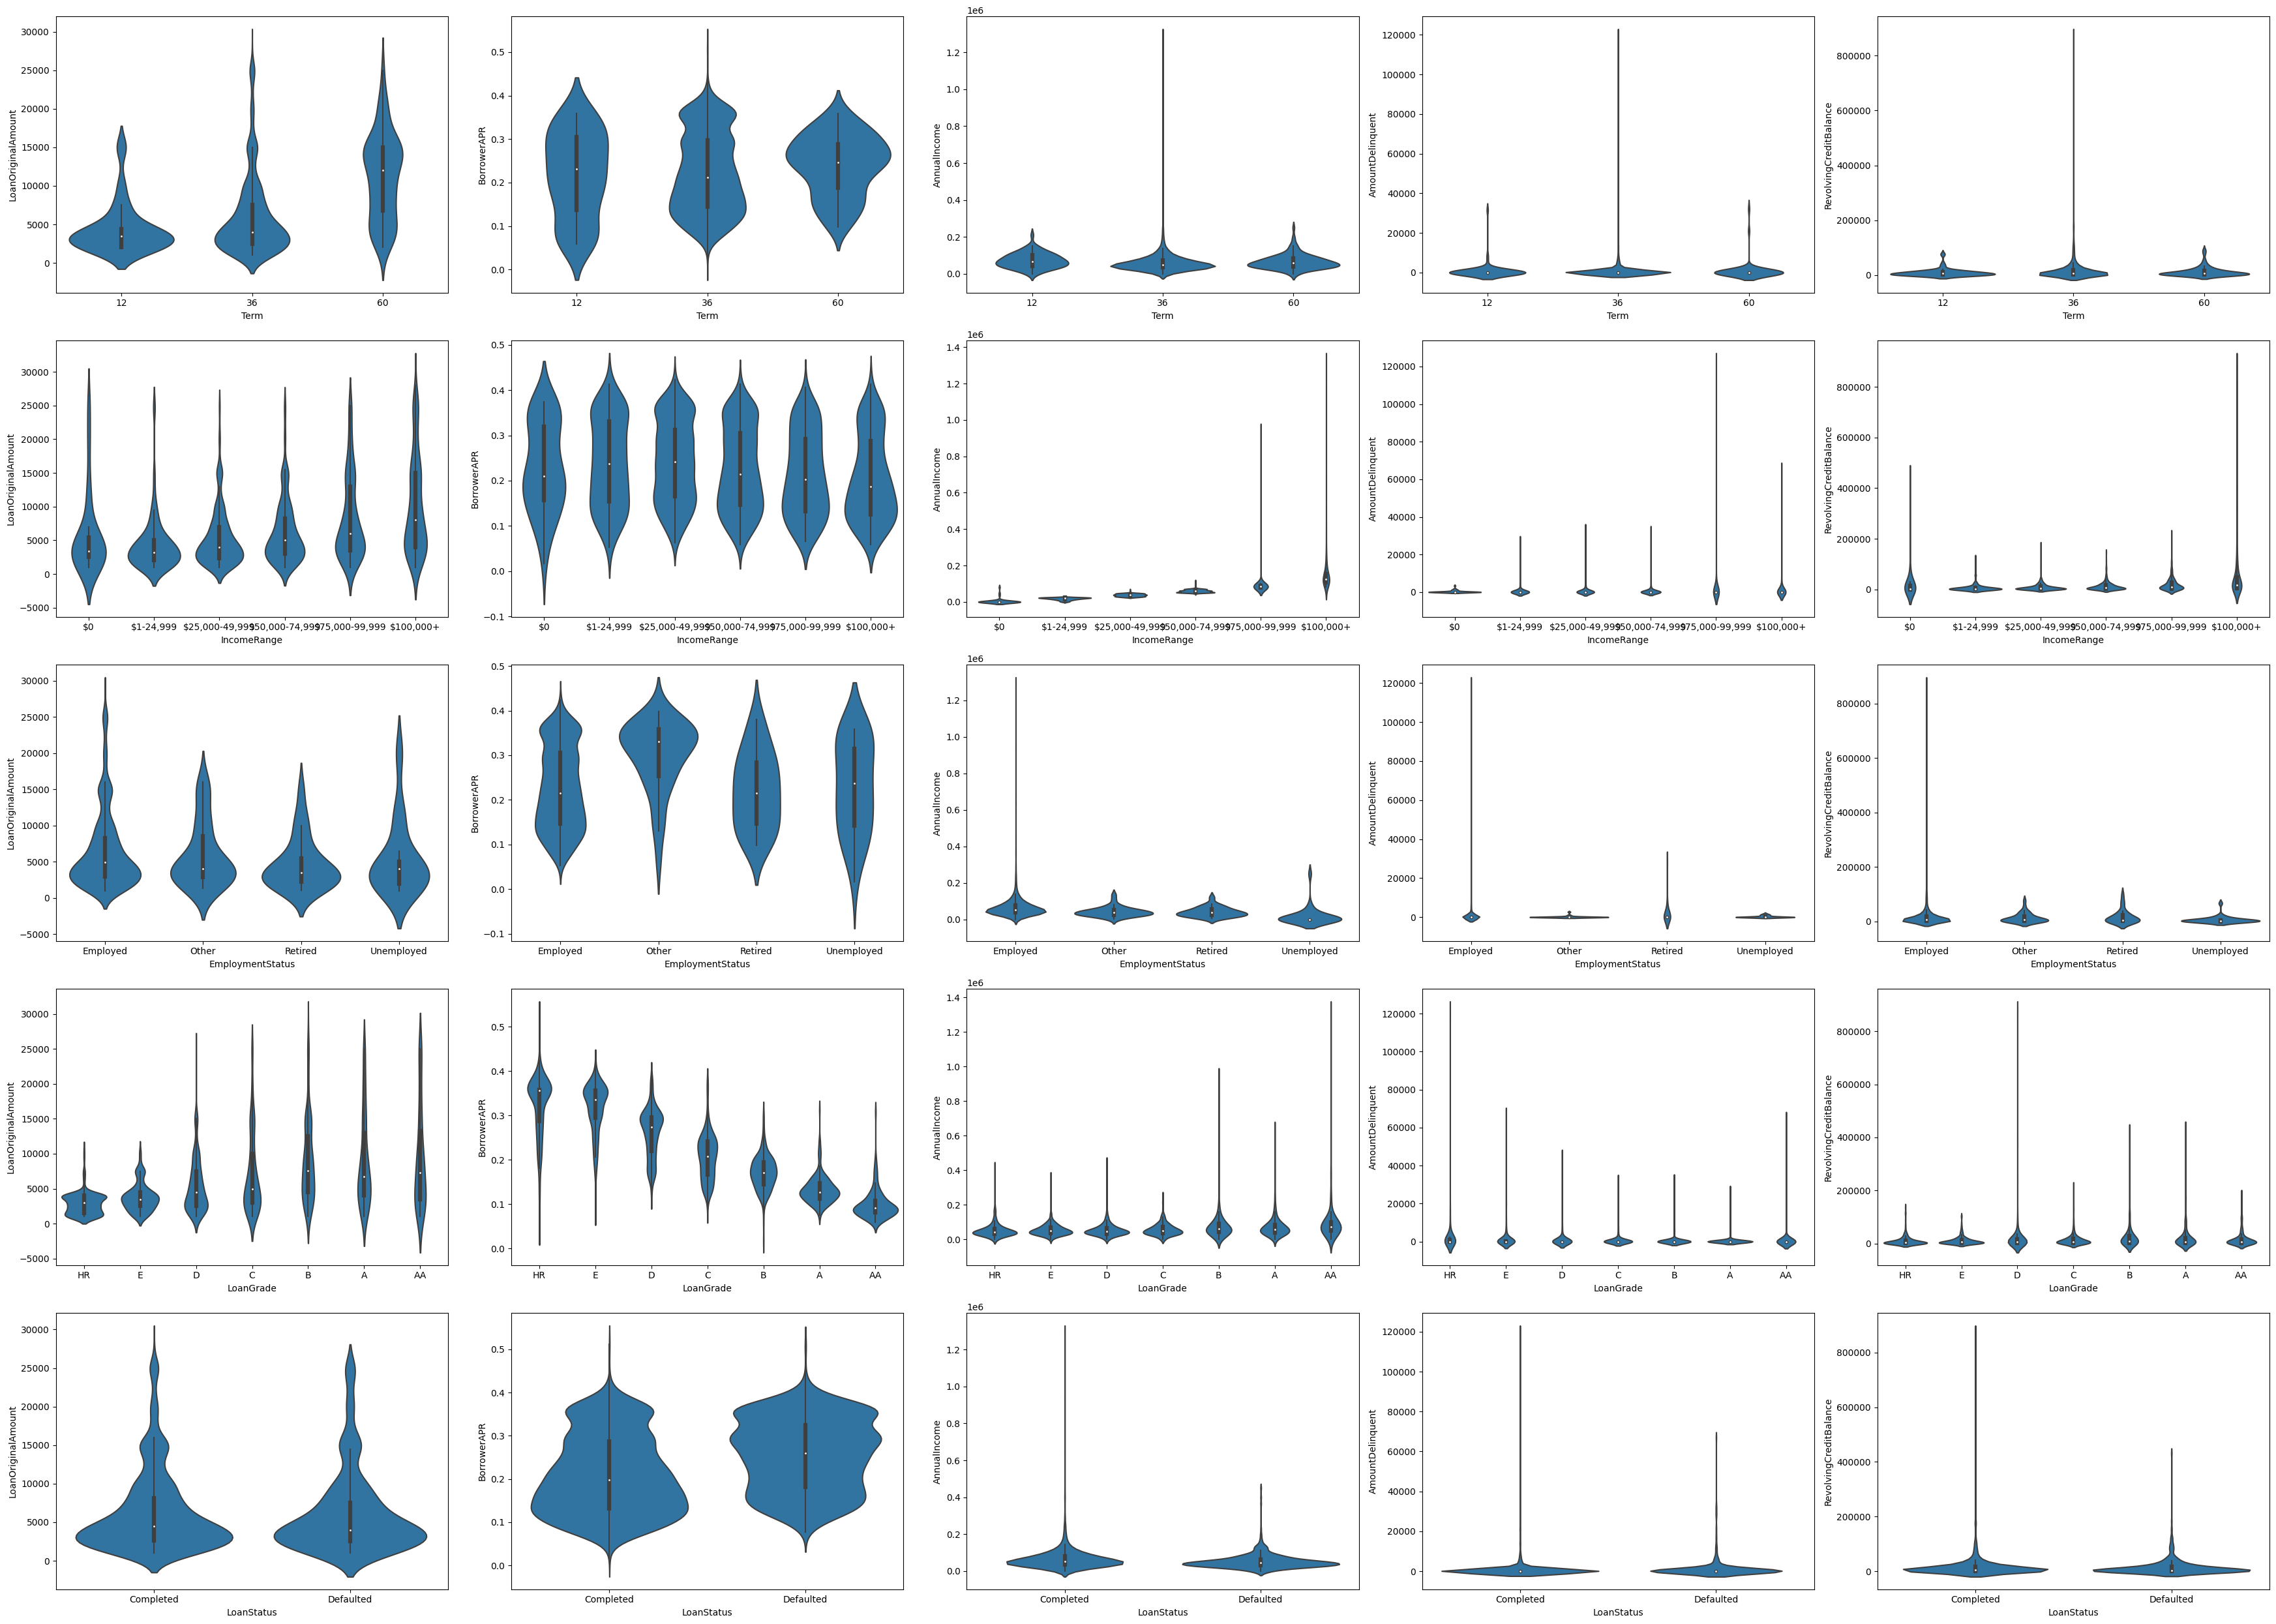

In [44]:
# Investigate the numerical and categorical variables relations with violin plots

loan_samples = loans.sample(n=2000, replace = False)

fig, ax = plt.subplots(ncols=len(numeric_vars), nrows=len(categoric_vars) , figsize=[35,25])

for i, category in enumerate(categoric_vars):
    for j, n_var in enumerate(numeric_vars):
        sb.violinplot(data=loan_samples, x=category, y=n_var, ax=ax[i,j], color=default_color)

plt.tight_layout()
plt.show()

Most of the relationships are fixed with few alterations across categories. The annual income by income range show an interesting distribution with people with a higher income in the higher income range which makes sense.
There is an interesting observation between the borrower APR and the loan grade. There is a steady drop in borrower APR with incread in loan grade.

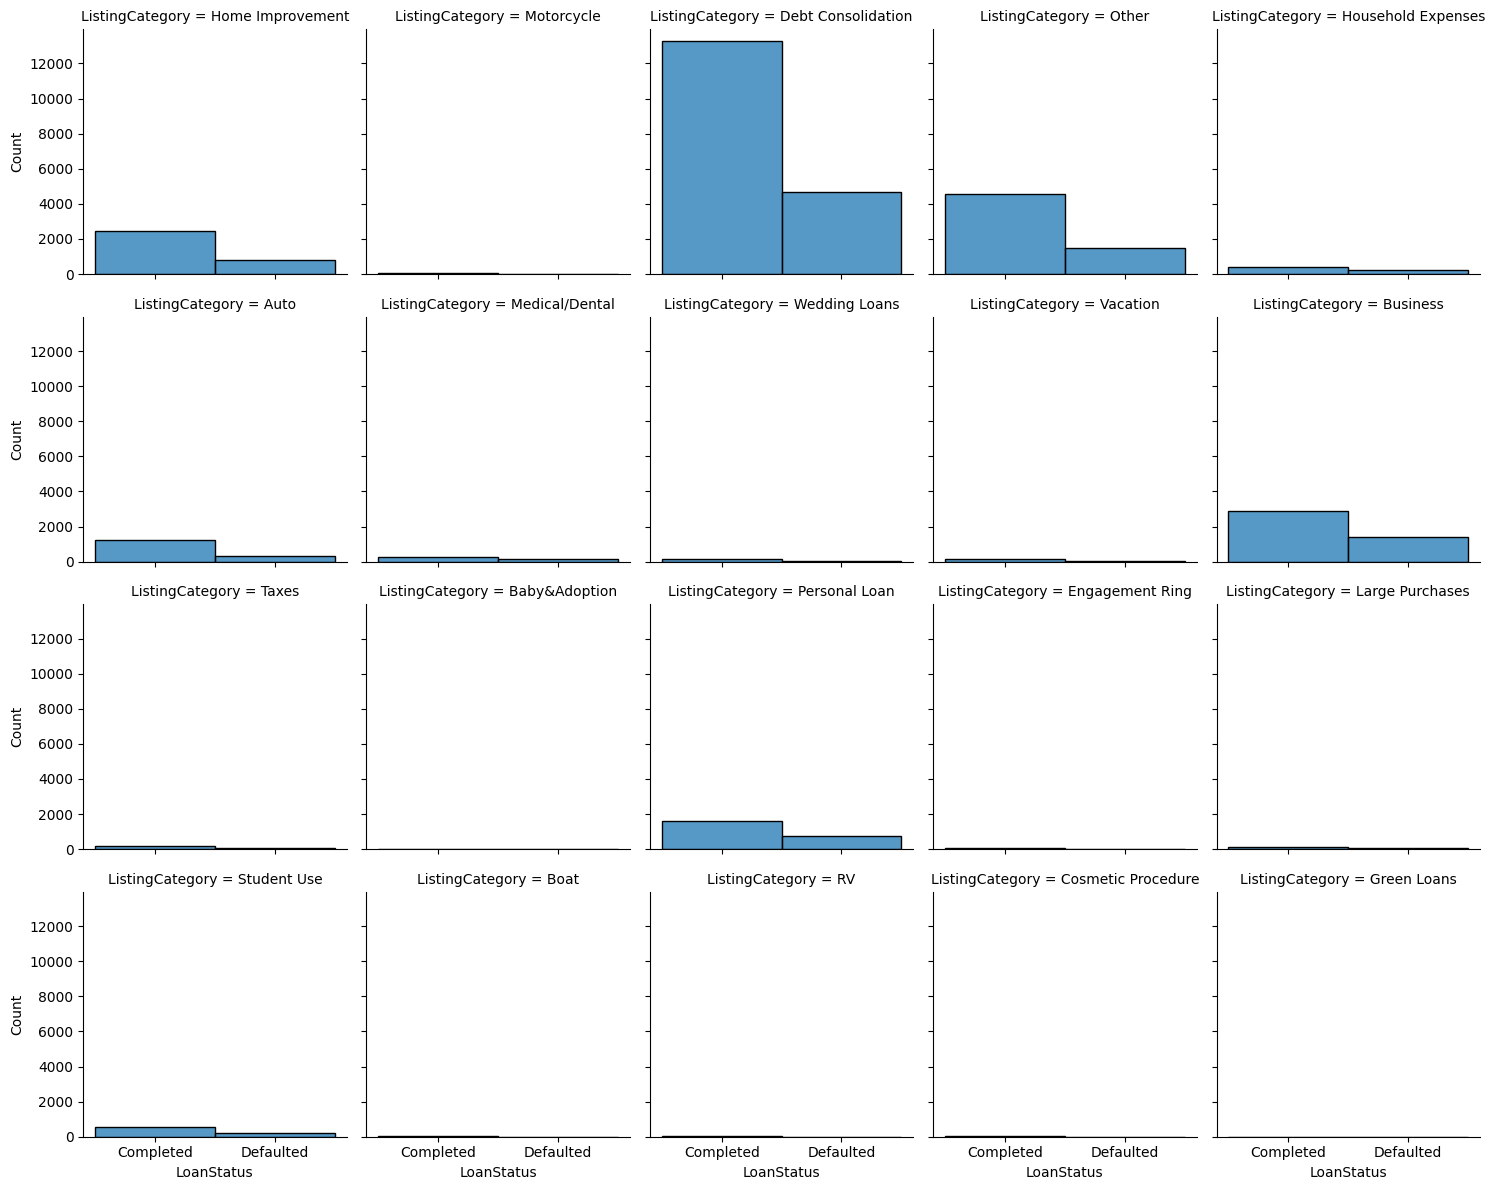

In [45]:
grid = sb.FacetGrid(loans, col='ListingCategory', col_wrap=5)
grid.map(sb.histplot, 'LoanStatus')
plt.show()

Investigating the listing category frequency with the loan status does not prove very insightful especially given the skewd nature of our dataset which contains significantly more completed loans than defaulted loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There was an interesting observation with between the loan status and the borrowers APR in the voilin plot. The mean showed that the higher the APR, the higher the chance of default. I also observed loan with larger amounts were taken for longer terms too.

Per yearly quarter, more loans were taken before 2009 and the loan default rate was also significantly higher in that period. After 2009, fewer loans were taken and the loans also had a lower default rate.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There was an expected correlation between the annual income and income range. Most of the other relation ships were mostly stacked on one value across categories or value levels.

I also observed that most Unemployed listings and took more of the smaller loans.

## Multivariate Exploration

First I will investigate how numerica values interact with each other with respect to the loan status.

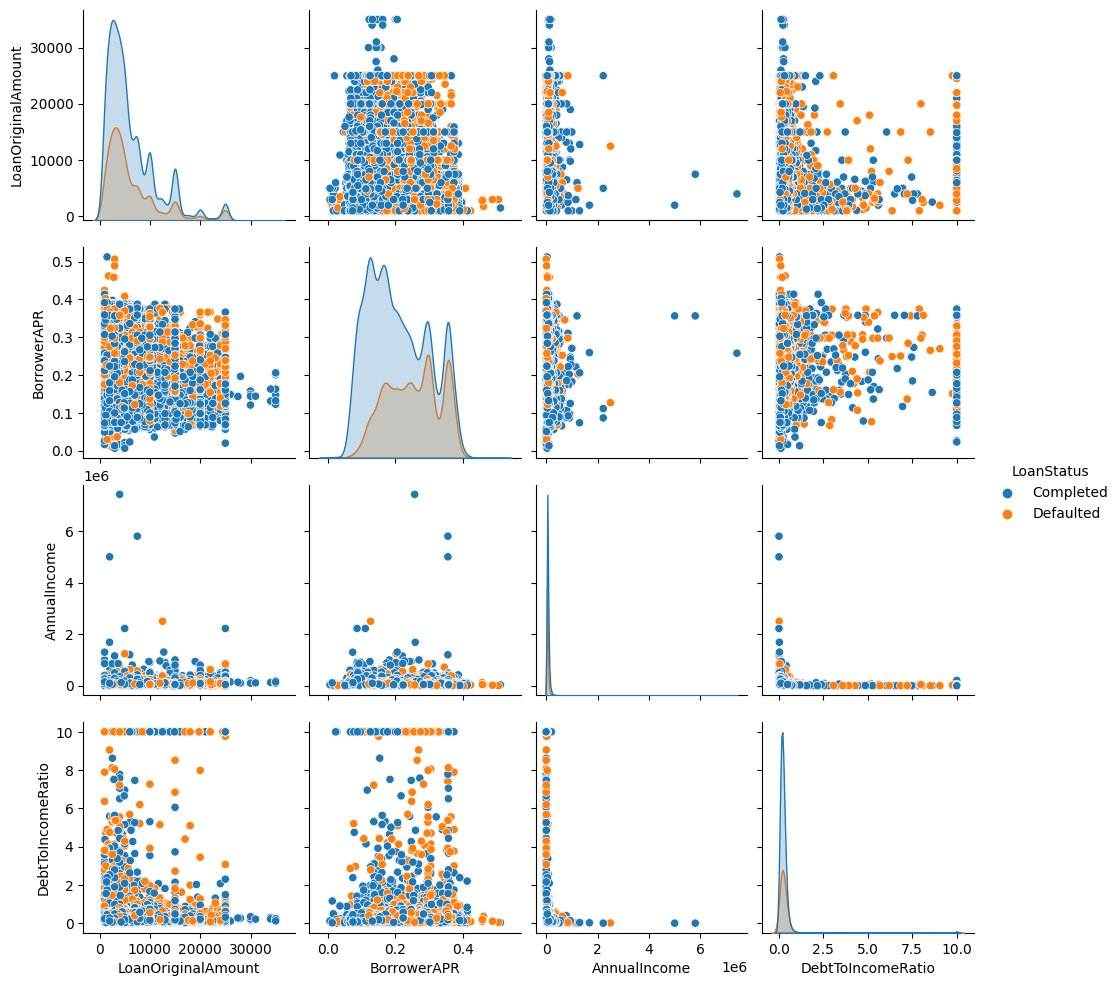

In [46]:
# Use PairPlot to Observe correlation between numeracal values of interest and loan status

sb.pairplot(data=loans, vars=['LoanOriginalAmount', 'BorrowerAPR', 'AnnualIncome', 'DebtToIncomeRatio'],
            hue='LoanStatus')

plt.show()

The pairplot of numeric variables with the loan status as hue has very interesting insights, though the numeric variables do not have any strong correlations, I could observe that at certain values in the number of defaulters increased. For example, we can observe that at higher borrower  APR, there were more defaulters and this observation is also true for variables like the annual income and the debt to income ratio, the 

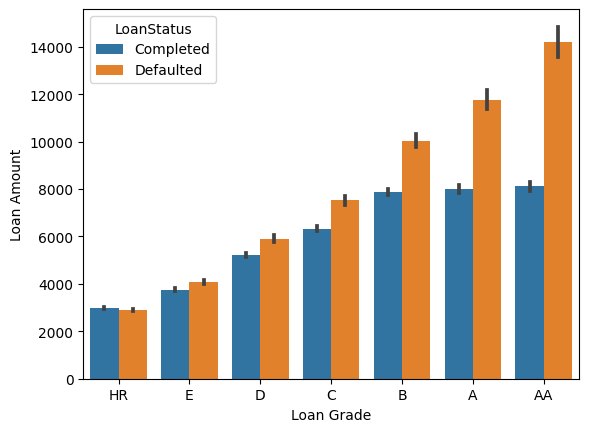

In [47]:
sb.barplot(x='LoanGrade', y='LoanOriginalAmount', data=loans, hue='LoanStatus')
plt.ylabel("Loan Amount")
plt.xlabel("Loan Grade")
plt.show()

A plot of the loan amount with the loan grade shows that high risk loans which is directly proportional to loan amount have high default rates. You can notice this by oberserving the in increase the difference between completed and defaulted loans.

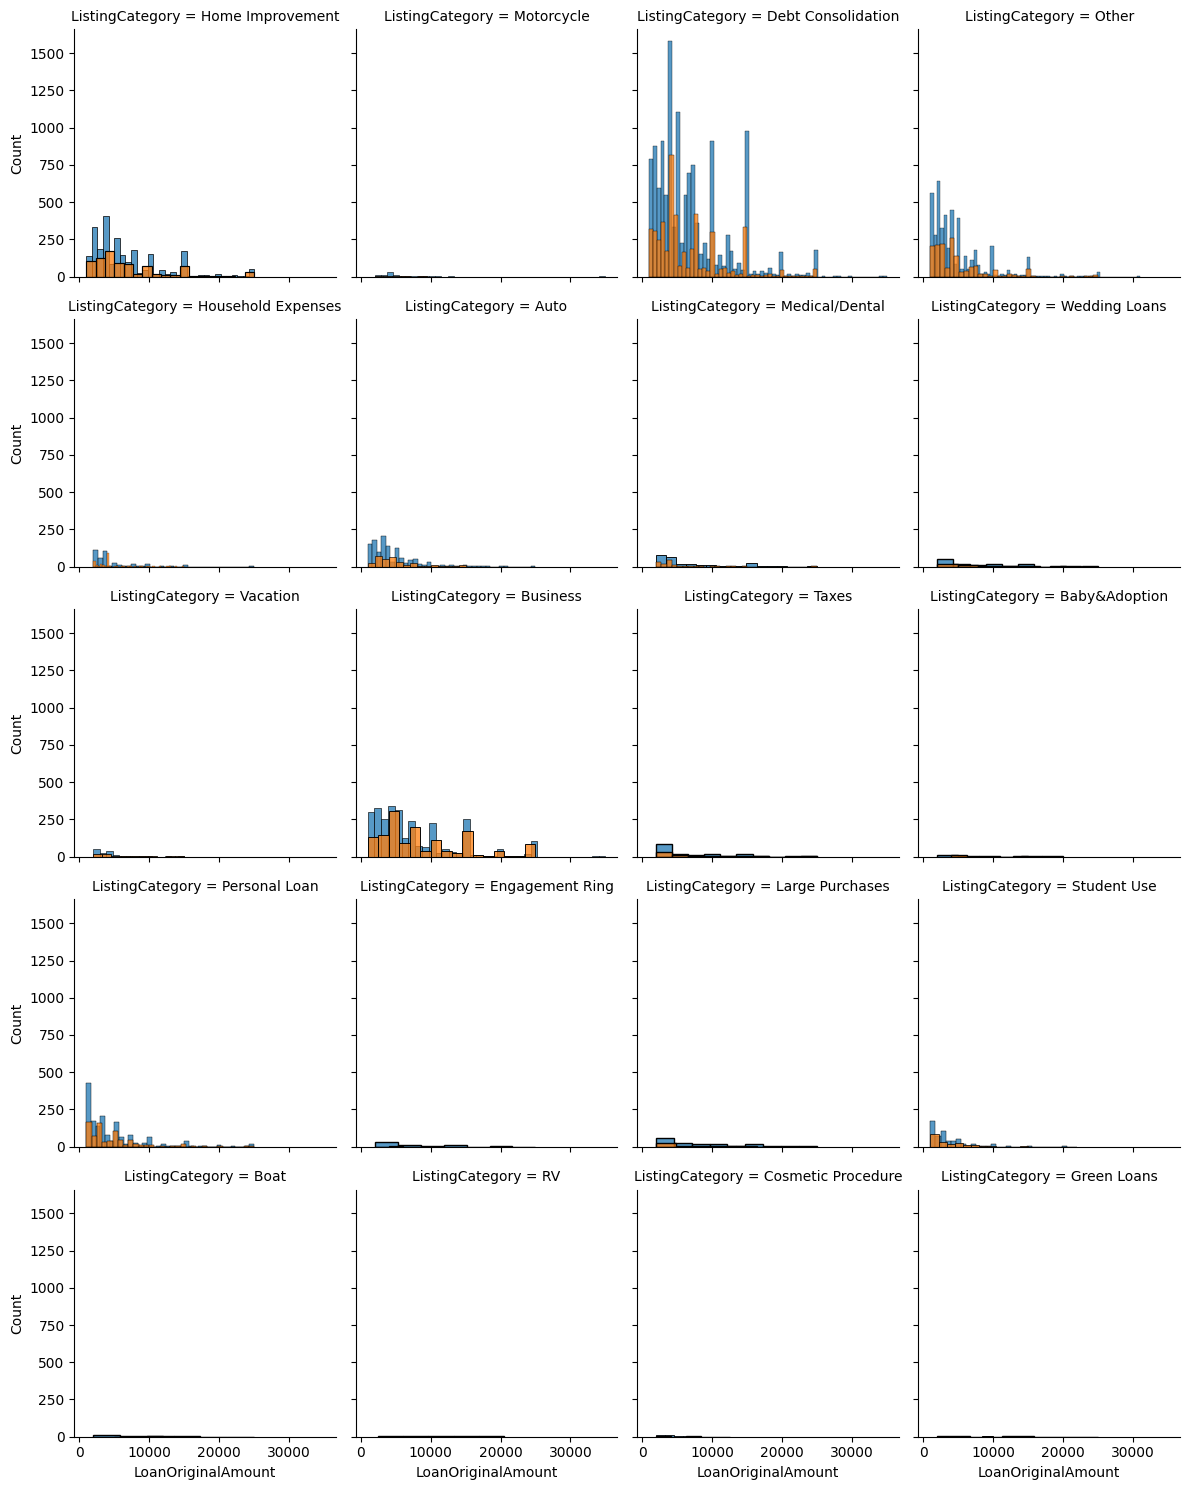

In [48]:
# Use FacetGrid of histPlot to investigate the relationship between ListingCategory, LoanStatus and Loan Amount

grid = sb.FacetGrid(loans, col='ListingCategory', hue='LoanStatus', col_wrap=4)
grid.map(sb.histplot, 'LoanOriginalAmount')
plt.show()

Investigating the loan amount for each loan purpose and observing their default rate shows that loans taken for business had higher default rates with increasing loan amount.
This is also true for Home Improvement loans where the default rate increases with increase in loan amount.
Loans taken for debt consolidation had the relatively lowest default rates across all amounts.

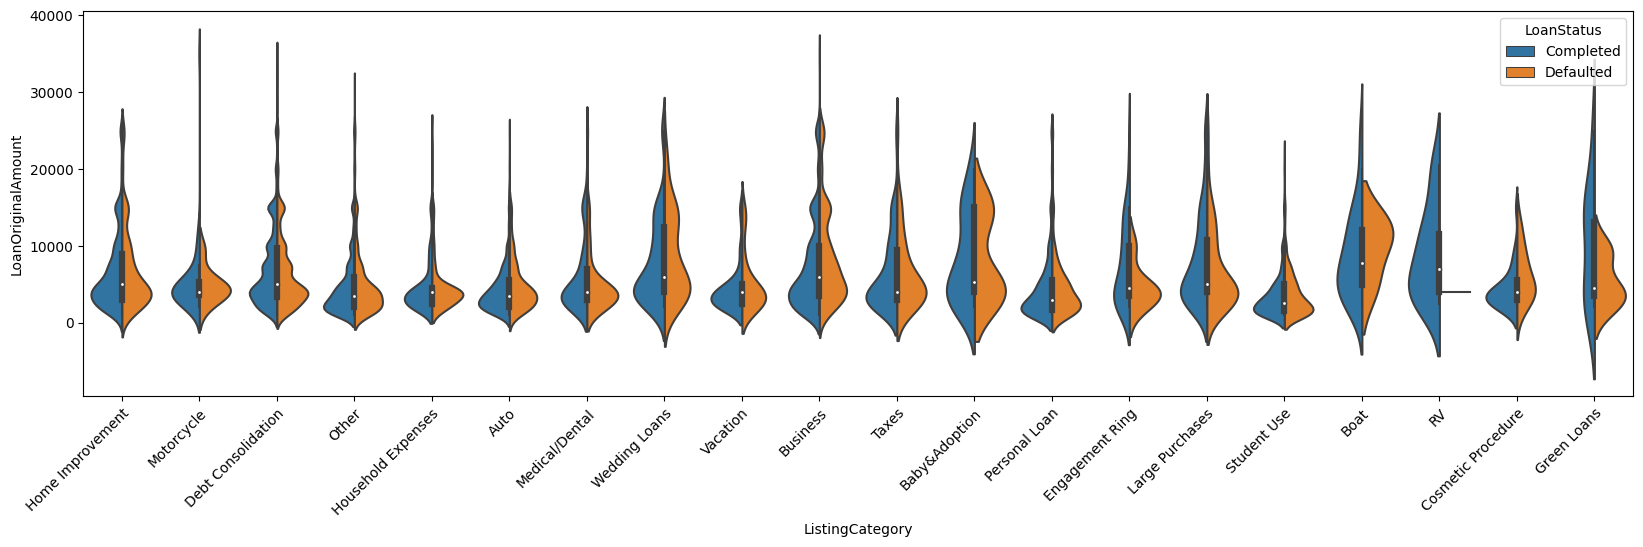

In [49]:
# Investigate with a violin plot to better observe the rates with the smaller loan amounts and frequency.
plt.figure(figsize = [20, 5])

# Plot violin plot of loan purpose and loan amount by default status
sb.violinplot(x="ListingCategory", y="LoanOriginalAmount", hue="LoanStatus", data=loans, split=True)

plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

plt.show()

The violin plots makes the observations even clearer. There are more defaulter for boat loans with high loan amounts.
We also see big shifts to right, that is more higher default rates in household expense, wedding, auto, medical, vacation loans. This could be due to the fact that these are purposes which depreciate in value over time.

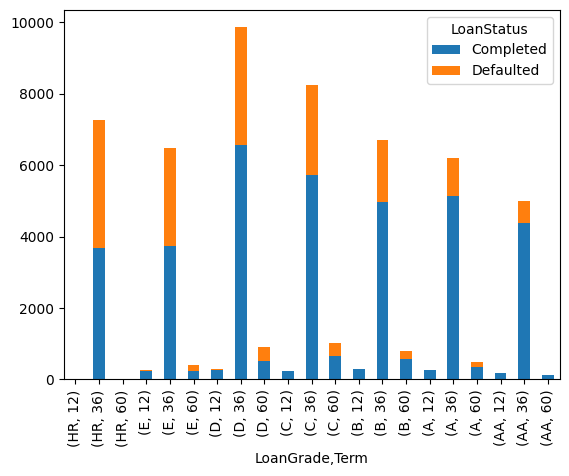

In [50]:
# Group data by loan purpose, loan grade, loan term, and default status
grouped = loans.groupby(["LoanGrade", "Term", "LoanStatus"]).size().unstack(fill_value=0)

# Plot clustered bar chart of loan grade, loan term, and default status by loan purpose
grouped.plot(kind="bar", stacked=True)

plt.show()

The investigation of loan status by term and grade shows an increase in default rate with increase in loan term with much higher default rates in low grade loans such the HR, E and D grades.

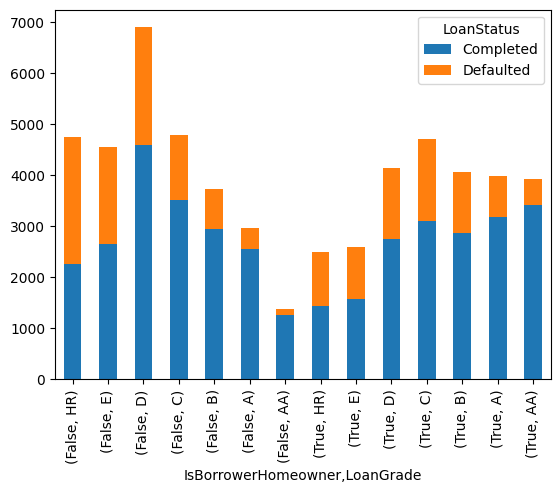

In [51]:
# Group data by home ownership status, loan purpose, loan grade, and default status
grouped = loans.groupby(["IsBorrowerHomeowner", "LoanGrade", "LoanStatus"]).size().unstack(fill_value=0)

# Plot clustered bar chart of loan purpose, loan grade, and default status by home ownership status
grouped.plot(kind="bar", stacked=True)

plt.show()

Grade C loans are more popular among non-homeowners. However, non-homeowners show a much higher default rate than home owners. Homeowners seem to take higher grade loans and are also very likely to repay the loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Observing more than 2 variables at a time definitely showed some more interesting insights. Observing the loan amount with the listing category with loan status revealed that that listing categories with depreciating returns had more defaults compared to loans taken for business or other types of investments.

### Were there any interesting or surprising interactions between features?

The multivariate analysis really showed how combining features had effect on loan status. Compared to bivariate analysis which mostly showed little correlations.

## Conclusions

In the end, it can be observed that single variables have little impact on loan default rate as observed in the univariate and bivariate analzsis. Coming down to multivariate analysis, it was clearer how combining multiple variables showed clearer patterns in loan default rates.
